<a href="https://colab.research.google.com/github/aakarshan-coding/Music-Recommendation-System/blob/main/Spotify_Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


spotify_dataset = pd.read_csv("genres_v2.csv")


spotify_dataset.count()


/tmp/ipython-input-4-1205384104.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_dataset = pd.read_csv("genres_v2.csv")


,0
danceability,42305
energy,42305
key,42305
loudness,42305
mode,42305
speechiness,42305
acousticness,42305
instrumentalness,42305
liveness,42305
valence,42305


In [ ]:
spotify_dataset['Unnamed: 0'].count() + spotify_dataset['song_name'].count()

np.int64(42299)

In [ ]:
spotify_dataset['type'].value_counts()

,count
type,
audio_features,42305


In [ ]:
spotify_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
X = spotify_dataset.drop(columns=['song_name','Unnamed: 0', 'analysis_url','track_href','id','uri','type',])

X.head()



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,NaN


In [ ]:
spotify_dataset['title'].value_counts()


,count
title,
Euphoric Hardstyle,1398
UKF Drum & Bass - All Uploads,907
Top Trance Songs EVER,771
I'm a fucking Headbanger,715
Dark Techno Rave,680
...,...
Trance List | TOP Trance,18
EDC 2020 Bass Pod,16
Best New Techno - When We Dip,13


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans

categorical_cols = ['genre','title']

numerical_cols = [i for i in X.columns if i not in categorical_cols]


preprocessing = ColumnTransformer([

    ('categorical', Pipeline([
        ('impute',SimpleImputer(strategy='constant',fill_value='Unknown')),
        ('onehot',OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
        ('normalize',Normalizer())
    ])
     ,categorical_cols),

    ('numerical', Pipeline([
        ('impute',KNNImputer(n_neighbors=5)),
        ('scale',StandardScaler())
    ])
     ,numerical_cols)

])

pipeline = Pipeline([
    ('pre',preprocessing),
    ('kmeans',KMeans(n_clusters=5,random_state=0,n_init="auto"))
])

pipeline.fit(X)

labels = pipeline.named_steps['kmeans'].labels_




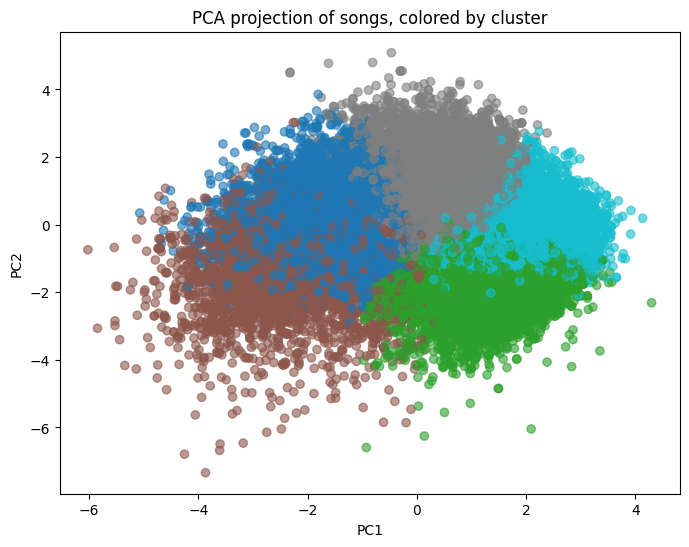

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Transform your data through the preprocessing step
X_proc = pipeline.named_steps['pre'].transform(X)

# 2) Run PCA (or replace with TSNE for a non-linear view)
pca = PCA(n_components=2, random_state=0)
coords = pca.fit_transform(X_proc)

# 3) Scatter, color by cluster label
labels = pipeline.named_steps['kmeans'].labels_
plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.title("PCA projection of songs, colored by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
